In [ ]:
from pandas import read_csv, DataFrame
from factor_analyzer import FactorAnalyzer

project_home = '/Users/catcamacho/Box/SNAP/BABIES/quest_analysis/'
ibq_data = read_csv(project_home + 'ibq_fullsample.csv', index_col=None)
features=ibq_data.iloc[:,1:15]

fa = FactorAnalyzer()
fa.analyze(features,3,rotation='oblimin', method='ml', normalize=True)
print(fa.get_factor_variance())

In [41]:
loadings = fa.loadings
loadings = loadings.sort_values('Factor1')
print(loadings)

                          Factor1   Factor2   Factor3
sadness                 -0.113272  0.616719  0.248510
falling_reactivity      -0.024184 -0.582010  0.294196
low_intensity_pleasure  -0.000284 -0.090411  0.710157
fear                     0.054280  0.441408  0.222584
distress_to_limitations  0.066014  0.720974 -0.079509
cuddliness               0.082556 -0.346059  0.116990
duration_of_orienting    0.097201  0.022894  0.232563
activity_level           0.163485  0.405854 -0.003259
perceptual_sensitivity   0.203467  0.082081  0.510163
soothability             0.268888 -0.448408  0.110051
approach                 0.412129  0.043546  0.257188
vocal_reactivity         0.661120  0.149744 -0.035488
high_intensity_pleasure  0.748200  0.001894  0.057749
smiling_laughter         0.817479 -0.082888 -0.024263


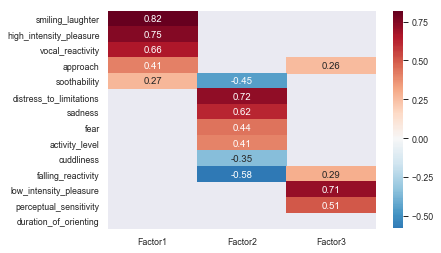

In [42]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(context='paper')
mask_upper = fa.loadings
mask_upper = mask_upper[mask_upper>=0.25]
mask_lower = fa.loadings
mask_lower = mask_lower[mask_lower<=-0.25]
mask = mask_upper.radd(mask_lower, fill_value=0)
mask = mask.sort_values(by=['Factor1','Factor2','Factor3'], ascending=False)
sns.heatmap(mask, annot=True, cmap='RdBu_r', center=0)
plt.savefig(project_home + 'loadings_labeled_3factor.svg')
plt.show()

In [43]:
factor_scores = fa.get_scores(features)
ibq_data = ibq_data.join(factor_scores)
ibq_data.to_csv(project_home + 'ibq_fullsample_with3factors.csv')
ibq_data.head()

,ID,activity_level,distress_to_limitations,fear,duration_of_orienting,smiling_laughter,high_intensity_pleasure,low_intensity_pleasure,soothability,falling_reactivity,...,sadness,approach,vocal_reactivity,SUR,NEG,REG,age,Factor1,Factor2,Factor3
0,2,6.428571,5.857143,2.666667,4.666667,3.857143,5.571429,5.428571,4.571429,4.000000,...,6.333333,5.833333,5.571429,5.265873,4.714286,5.000000,4.829701,-0.526361,2.161550,-0.404682
1,3,6.571429,3.857143,3.333333,4.333333,6.428571,7.000000,6.714286,7.000000,5.166667,...,1.500000,7.000000,6.285714,6.797619,2.880952,6.220238,6.636732,1.821687,-0.469163,0.960001
2,7,3.857143,6.000000,2.833333,3.333333,4.000000,6.285714,4.571429,5.000000,4.000000,...,5.500000,5.833333,4.571429,5.230159,4.583333,4.684524,5.026832,-0.352932,1.638228,-0.569927
3,10,4.714286,4.571429,1.666667,3.500000,4.714286,5.857143,6.571429,4.571429,3.166667,...,3.000000,5.500000,5.857143,5.162698,3.517857,4.660714,6.111050,-0.093306,0.984347,-0.546241
4,12,4.428571,4.142857,2.333333,4.166667,5.285714,7.000000,6.285714,6.571429,6.666667,...,3.333333,5.833333,3.000000,5.369048,2.785714,5.797619,6.406746,0.238951,-0.782946,0.894331


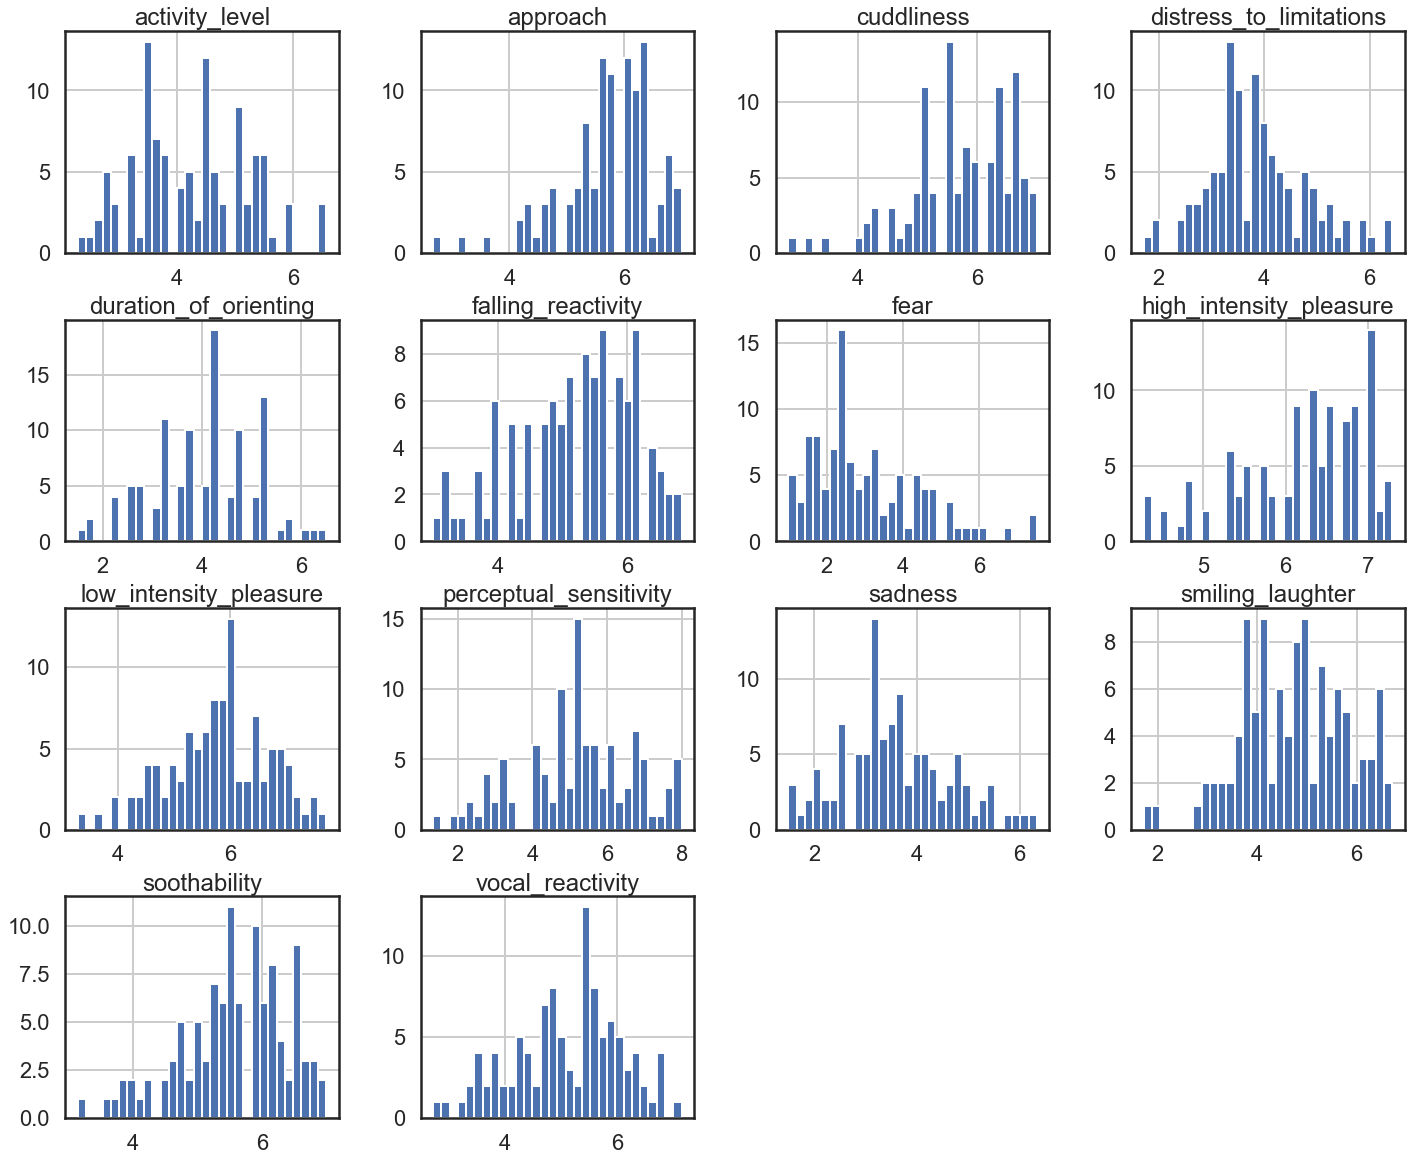

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='poster',style='white')
features.hist(bins=30, figsize=(24,20))
plt.savefig(project_home + 'scale_distributions.svg')
plt.show()

In [ ]:
import seaborn as sns
from numpy import zeros_like, triu_indices_from, bool

mask = zeros_like(correlations, dtype=bool)
mask[triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(12,12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlations, mask=mask, cmap=cmap, vmax=.7, center=0,
            square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.savefig(project_home + 'ibq_corr_matrix.png')

In [ ]:
from pandas import read_excel
import matplotlib.pyplot as plt

data= read_excel('/Users/catcamacho/Box/SNAP/BABIES/doc/BABIES_ASL_Master_Tracker_FULL_10.6.18.xlsx', index_col=None, sheetname=0)
data.columns

In [ ]:
import numpy as np
data = data.dropna(subset=['mean_reg_neg'])

import seaborn as sns
sns.set(context='talk',style='white')
sns.jointplot(x='mean_reg_neg',y='mean_reg_pos', data=data, kind='reg')

from scipy.stats import spearmanr
r,p = spearmanr(data['mean_reg_neg'],data['mean_reg_pos'])
print('rho: ' + str(r) + ' pval=' + str(p))

for variable in ['mean_reg_pos','mean_react_dis','Age at Interaction Session (months)',
                 'Factor2','Factor3']:
    plt.figure()
    sns.distplot(data[variable],norm_hist=False, rug=True)
    #plt.savefig(variable + '.svg')